<a href="https://colab.research.google.com/github/leo-hoet/deep_learning_notebooks/blob/main/TP1_manual_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import math
import seaborn as sns

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0])

def f(x):
  return bool(x[0]) != bool(x[1])

def error(y, y_hat):
  return  abs(y - y_hat) ** 2

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def L_partial_yhat(y, y_hat):
  return (-2) * (y - y_hat)

def sigmoid_diff(point):
  return (sigmoid(point) * (1 - (sigmoid(point))))

def partial_derivate_respect(param: 'str',y ,y_hat, w, b,x) -> float:
  if param == 'w111':
    z111 = w[0] * x[0] + w[1] * x[1] + b[0]
    return L_partial_yhat(y, y_hat) * w[5] * sigmoid_diff(z111) * x[0]
  elif param == 'w121':
    z111 = w[0] * x[0] + w[1] * x[1] + b[0]
    return L_partial_yhat(y, y_hat) * w[5] * sigmoid_diff(z111) * x[1]
  elif param == 'w211':
    z121 = w[2] * x[0] + w[3] * x[1] + b[1]
    return L_partial_yhat(y, y_hat) * w[4] * sigmoid_diff(z121) * x[0]
  elif param == 'w221':
    z121 = w[2] * x[0] + w[3] * x[1] + b[1]
    return L_partial_yhat(y, y_hat) * w[4] * sigmoid_diff(z121) * x[1]
  elif param == 'w112':
    z111 = w[0] * x[0] + w[1] * x[1] + b[0]
    return L_partial_yhat(y, y_hat) * sigmoid(z111)
  elif param == 'w122':
    z121 = w[2] * x[0] + w[3] * x[1] + b[1]
    return L_partial_yhat(y, y_hat) * sigmoid(z121)
  elif param == 'b11':
    return L_partial_yhat(y, y_hat) * w[5] * sigmoid_diff(w[0] * x[0] + w[1] * x[0] + b[0]) * 1
  elif param == 'b21':
    return L_partial_yhat(y, y_hat) * w[4] * sigmoid_diff(w[2] * x[0] + w[3] * x[1] + b[1]) * 1
  elif param == 'b12':
    return L_partial_yhat(y, y_hat) * 1

def forward(x, w, b) -> float:
  # First layer
  z111 = w[0] * x[0] + w[1] * x[1] + b[0]
  z121 = w[2] * x[0] + w[3] * x[1] + b[1]
  a111 = act_func(z111)
  a121 = act_func(z121)

  # second layer
  z112 = w[4] * a111 + w[5] * a121 + b[2]

  return z112

In [3]:
# hyper paramteres
epochs = 100
act_func = sigmoid
learning_rate = 0.1

In [4]:
# Compute sdg for xor

w = np.array([random.random() for _ in range(6)])
b = np.array([random.random() for _ in range(3)])
errs = []
mserros = []
mse = []
for epoch in range(epochs):
  for x in X:
    y_hat = forward(x,w,b)
    y = f(x)
    

    w[0] = w[0] - learning_rate * partial_derivate_respect('w111', y, y_hat, w, b, x)
    w[1] = w[1] - learning_rate * partial_derivate_respect('w121', y, y_hat, w, b, x)
    w[2] = w[2] - learning_rate * partial_derivate_respect('w211', y, y_hat, w, b, x)
    w[3] = w[3] - learning_rate * partial_derivate_respect('w221', y, y_hat, w, b, x)
    w[4] = w[4] - learning_rate * partial_derivate_respect('w112', y, y_hat, w, b, x)
    w[5] = w[5] - learning_rate * partial_derivate_respect('w122', y, y_hat, w, b, x)
    b[0] = b[0] - learning_rate * partial_derivate_respect('b11', y, y_hat, w, b, x)
    b[1] = b[1] - learning_rate * partial_derivate_respect('b21', y, y_hat, w, b, x)
    b[2] = b[2] - learning_rate * partial_derivate_respect('b12', y, y_hat, w, b, x)

    err = error(y, y_hat)
    errs.append(err)
  mse.append(0.25 * err)

[Text(0, 0.5, 'MSE'), Text(0.5, 0, 'epochs'), Text(0.5, 1.0, 'MSE vs epochs')]

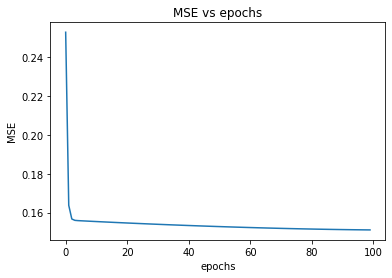

In [9]:
data =  [{'epoch': i, 'msee': m} for i, m in enumerate(mse)]
sns.lineplot(x=range(epochs), y=mse).set(title='MSE vs epochs', xlabel='epochs',ylabel='MSE')